In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
a = np.rand(1,0,1000)
plt.(a,a)

In [2]:
data = pd.read_csv('coffees.csv')

In [3]:
# .head() shows just the first few rows
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


In [4]:
# .loc 
# .iloc is an integer lookup
data.iloc[2]

timestamp      2011-10-05 07:02:00
coffees                    testing
contributor                Anthony
Name: 2, dtype: object

In [5]:
# Retrieving the values in the column. We can index just like a list.
data.coffees[:5]

0      397.0
1      410.0
2    testing
3        NaN
4      464.0
Name: coffees, dtype: object

In [6]:
# .describe() gives you information about the dataframe
data.describe()

,timestamp,coffees,contributor
count,671,658,671
unique,671,654,9
top,2012-05-17 13:02:00,9134.0,Quentin
freq,1,2,367


In [7]:
# .isnull() and boolean indexing with []
# Let's see all the columns in data.coffees and
# show which ones are null

data.coffees.isnull()

# Let's see where data.coffees has null points
data[data.coffees.isnull()]

,timestamp,coffees,contributor
3,2011-10-05 08:25:00,NaN,Quentin
15,2011-10-07 14:10:00,NaN,Ben
72,2011-10-28 10:53:00,NaN,Mike M
95,2011-11-11 11:13:00,NaN,Quentin
323,2012-06-10 16:10:00,NaN,Sergio
370,2012-07-13 13:59:00,NaN,Mike
394,2012-08-03 14:35:00,NaN,Sergio
479,2012-09-21 10:15:00,NaN,Sergio
562,2012-11-01 09:45:00,NaN,Quentin
606,2012-11-30 13:11:00,NaN,Quentin


In [8]:
# .dtypes describes the types of all the columns in the dataframe
data.dtypes

# print the first element of the series with [] indexing
print data.timestamp[0]

# print its type()
print type(data.timestamp[0])

# We get that it is a string because it is being read in from a csv

2011-10-03 08:22:00
<type 'str'>


In [9]:
# Cast the coffees column using pd.to_numeric, and coerce errors.
# We can use the kwarg "errors='coerce'" to force errors (such as strings)
# to be NaNs instead.

data.coffees = pd.to_numeric(data.coffees, errors='coerce')
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,NaN,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


In [10]:
# .dropna() using a subset, and pass inplace
data = data.dropna()
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
4,2011-10-05 10:47:00,464.0,Quentin
5,2011-10-05 13:15:00,481.0,Quentin
6,2011-10-06 07:21:00,503.0,Anthony


In [11]:
# Cast to int using .astype()
data.coffees = data.coffees.astype(int)

In [12]:
# pd.to_datetime()
data.timestamp = pd.to_datetime(data.timestamp)

# Confirm dtypes
data.dtypes

timestamp      datetime64[ns]
coffees                 int32
contributor            object
dtype: object

In [13]:
# .describe(), passing the "include" kwarg to see all information
data.describe(include='all')

,timestamp,coffees,contributor
count,657,657.000000,657
unique,657,NaN,9
top,2011-10-24 14:32:00,NaN,Quentin
freq,1,NaN,361
first,2011-10-03 08:22:00,NaN,NaN
last,2013-09-13 10:28:00,NaN,NaN
mean,NaN,8568.471842,NaN
std,NaN,4600.215049,NaN
min,NaN,397.000000,NaN
25%,NaN,4986.000000,NaN


In [14]:
# What do the first few rows look like?
data[:5]

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397,Quentin
1,2011-10-04 11:48:00,410,Quentin
4,2011-10-05 10:47:00,464,Quentin
5,2011-10-05 13:15:00,481,Quentin
6,2011-10-06 07:21:00,503,Anthony


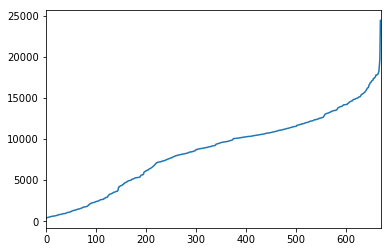

In [15]:
# .plot() on the coffees series
data.coffees.plot()

# pandas is plotting against the indices. We need to pass in the index

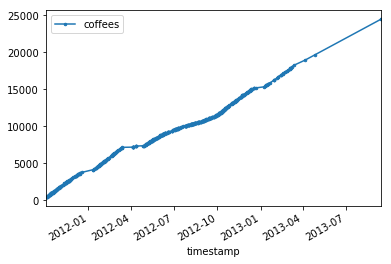

In [16]:
# We are setting the x axis to the timestamp, with dot-dash style
data.plot(x=data.timestamp, style=".-", markersize=5)

In [17]:
# .tail() with ten rows
data.tail(n=10)

,timestamp,coffees,contributor
661,2013-03-04 11:12:00,17793,Quentin
662,2013-03-04 16:43:00,17824,Quentin
663,2013-03-05 10:42:00,17852,Quentin
664,2013-03-05 13:29:00,17868,Quentin
665,2013-03-08 10:28:00,18062,Quentin
666,2013-03-12 08:28:00,18235,Sergio
667,2013-04-05 11:20:00,18942,Sergio
668,2013-04-27 11:04:00,19698,Sergio
669,2013-09-12 15:38:00,24450,Quentin
670,2013-09-13 10:28:00,24463,Quentin


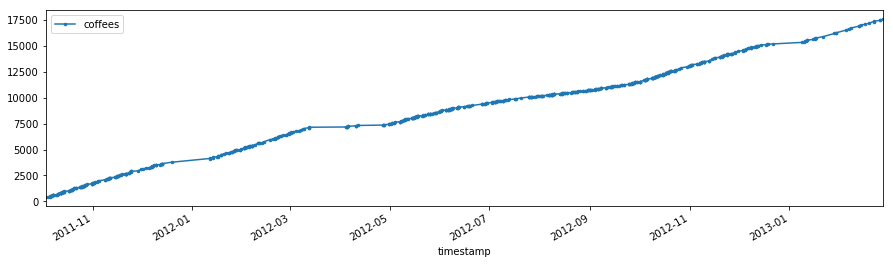

In [18]:
# Let's get rid of everything after the first of March.
# Use conditional indexing against the timestamp

data = data[data.timestamp < "2013-03-01"]
data.plot(x=data.timestamp, style=".-", markersize=5, figsize=[15,4])

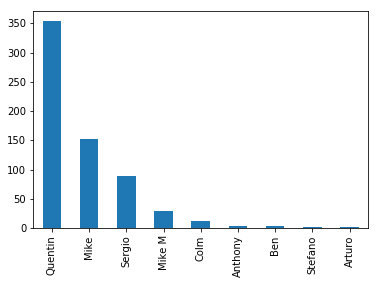

In [19]:
# .value_counts()
data.contributor.value_counts()
data.contributor.value_counts().plot(kind='bar')

In [20]:
# Create a series of the weekdays fpr each entry using .dt.weekday
weekdays = data.timestamp.dt.weekday

# .assign() it to our dataframe
data = data.assign(weekdays=weekdays)

weekday_names = ['Mon', 'Tues', 'Wed', "Thur", 'Fri', 'Sat', 'Sun']
weekday_dict = {key: weekday_names[key] for key in range(7)}

def day_of_week(idx):
    return weekday_dict[idx]

# Use .apply() to apply a custom function to the weekdays column

data.weekdays = data.weekdays.apply(day_of_week)
data.head()

,timestamp,coffees,contributor,weekdays
0,2011-10-03 08:22:00,397,Quentin,Mon
1,2011-10-04 11:48:00,410,Quentin,Tues
4,2011-10-05 10:47:00,464,Quentin,Wed
5,2011-10-05 13:15:00,481,Quentin,Wed
6,2011-10-06 07:21:00,503,Anthony,Thur


In [21]:
# .groupby() the weekdays and then .count() rows in each group
weekday_counts = data.groupby('weekdays').count()

# We can reorder this dataframe by our weekday_names list
weekday_counts = weekday_counts.loc[weekday_names]

weekday_counts

,timestamp,coffees,contributor
weekdays,,,
Mon,145,145,145
Tues,97,97,97
Wed,131,131,131
Thur,117,117,117
Fri,114,114,114
Sat,29,29,29
Sun,13,13,13


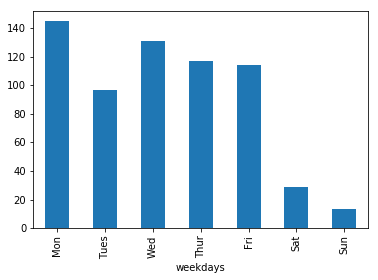

In [22]:
weekday_counts.coffees.plot(kind='bar')

In [23]:
# set dataframes .index property
data.index = data.timestamp

# Let's drop the timestamp column, as we no longer need it
# "axis = 1" means drop column instead of row
# inplace lets us save it to the data variable

data.drop(['timestamp'], axis=1, inplace=True)
data.head()

,coffees,contributor,weekdays
timestamp,,,
2011-10-03 08:22:00,397,Quentin,Mon
2011-10-04 11:48:00,410,Quentin,Tues
2011-10-05 10:47:00,464,Quentin,Wed
2011-10-05 13:15:00,481,Quentin,Wed
2011-10-06 07:21:00,503,Anthony,Thur


In [31]:
midnights = pd.date_range(data.index[0], data.index[-1],
                          freq='D', normalize=True)

new_index = midnights.union(data.index)
unsampled_data = data.reindex(new_index)
unsampled_data.head(10)

,coffees,contributor,weekdays
2011-10-03 00:00:00,NaN,NaN,NaN
2011-10-03 08:22:00,397.0,Quentin,Mon
2011-10-04 00:00:00,NaN,NaN,NaN
2011-10-04 11:48:00,410.0,Quentin,Tues
2011-10-05 00:00:00,NaN,NaN,NaN
2011-10-05 10:47:00,464.0,Quentin,Wed
2011-10-05 13:15:00,481.0,Quentin,Wed
2011-10-06 00:00:00,NaN,NaN,NaN
2011-10-06 07:21:00,503.0,Anthony,Thur
2011-10-06 10:04:00,513.0,Quentin,Thur


In [35]:
# We fill the NaNs with interpolation
unsampled_data = unsampled_data.interpolate(method='time')
unsampled_data.head(10)



,coffees,contributor,weekdays
2011-10-03 00:00:00,NaN,NaN,NaN
2011-10-03 08:22:00,397.000000,Quentin,Mon
2011-10-04 00:00:00,404.408262,NaN,NaN
2011-10-04 11:48:00,410.000000,Quentin,Tues
2011-10-05 00:00:00,438.664249,NaN,NaN
2011-10-05 10:47:00,464.000000,Quentin,Wed
2011-10-05 13:15:00,481.000000,Quentin,Wed
2011-10-06 00:00:00,494.066298,NaN,NaN
2011-10-06 07:21:00,503.000000,Anthony,Thur
2011-10-06 10:04:00,513.000000,Quentin,Thur


In [41]:
# .resample() followed by .asfreq()
daily_data = unsampled_data.resample("D").asfreq()
daily_data
# Drop the contributor column, we no longer need it.
daily_data = daily_data.drop(['contributor'], axis=1)

# Generate a column of weekday names
daily_data['weekdays'] = daily_data.index.weekday_name
daily_data.head()

,coffees,weekdays
2011-10-03,NaN,Monday
2011-10-04,404.408262,Tuesday
2011-10-05,438.664249,Wednesday
2011-10-06,494.066298,Thursday
2011-10-07,572.844311,Friday


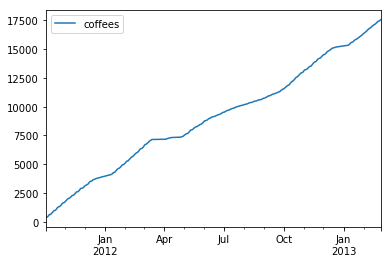

In [43]:
daily_data.plot()

In [45]:
coffees_by_day = daily_data.groupby('weekdays').mean()
coffees_by_day

,coffees
weekdays,
Friday,9041.387848
Monday,9107.593954
Saturday,9075.525882
Sunday,9091.825740
Thursday,8997.887023
Tuesday,9027.274897
Wednesday,9066.407862


In [51]:
coffees_made = daily_data.coffees.diff().shift(-1)

daily_data['coffes_made_today'] = coffees_made
daily_data.head(n=10)

,coffees,weekdays,coffes_made_today
2011-10-03,NaN,Monday,NaN
2011-10-04,404.408262,Tuesday,34.255987
2011-10-05,438.664249,Wednesday,55.402049
2011-10-06,494.066298,Thursday,78.778013
2011-10-07,572.844311,Friday,64.392941
2011-10-08,637.237253,Saturday,7.492196
2011-10-09,644.729448,Sunday,8.195209
2011-10-10,652.924658,Monday,81.648549
2011-10-11,734.573206,Tuesday,46.351008
2011-10-12,780.924214,Wednesday,71.254295


In [56]:
coffees_by_day = coffees_by_day.loc[weekday_names]
coffees_by_day.plot(kind='bar')

KeyError: "None of [['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']] are in the [index]"